In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/Shareddrives/FareSunday - Rakamin Final Project/Stage 3/Travel_project1_clean_type2.csv')
df.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Chance,Designation_Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Fe Male,Gender_Female,Gender_Male,CityTier_1,CityTier_2,CityTier_3
0,1,37.0,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
1,0,33.0,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0
2,0,38.0,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0
3,0,32.0,8.0,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0
4,0,59.0,9.0,2,2.0,5.0,5.0,1,2,1,1.0,17670.0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0


# Modelling

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Train and Test Data

In [ ]:
# Split Feature and Label
X = df.drop(columns=['Chance'])
y = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]

eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.50
Recall (Test Set): 0.44
F1-Score (Test Set): 0.47
AUC: 0.95


### Randomized search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet','none']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.p

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.002],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
 

Accuracy (Test Set): 0.96
Precision (Test Set): 0.70
Recall (Test Set): 0.85
F1-Score (Test Set): 0.77
AUC: 0.99


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.50
Recall (Test Set): 0.44
F1-Score (Test Set): 0.47
AUC: 0.95


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=99)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 60, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.54
Recall (Test Set): 0.56
F1-Score (Test Set): 0.55
AUC: 0.97


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

NameError: ignored

6 top feature only


In [ ]:
# Split Feature and Label
X2 = df[['PreferredPropertyStar', 'Age','NumberOfFollowups', 'Occupation_Large Business', 'MaritalStatus_Single',
         'MonthlyIncome', 'TypeofContact_Company Invited', 'DurationOfPitch', 'CityTier_1', 'OwnCar', 'MaritalStatus_Married',
         'NumberOfTrips']]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [ ]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 60, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
# Predict & Evaluation
y_pred2 = model.predict(X_test2)#Check performa dari model
y_proba2 = model.predict_proba(X_test2)
y_proba2 = y_proba2[:,1]
eval_classification(model, y_pred2, y_proba2, X_train2, y_train2, X_test2, y_test2)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.92
Recall (Test Set): 0.81
F1-Score (Test Set): 0.86
AUC: 0.94


### Bagging : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(rf, y_pred, y_proba, X_train, y_train, X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

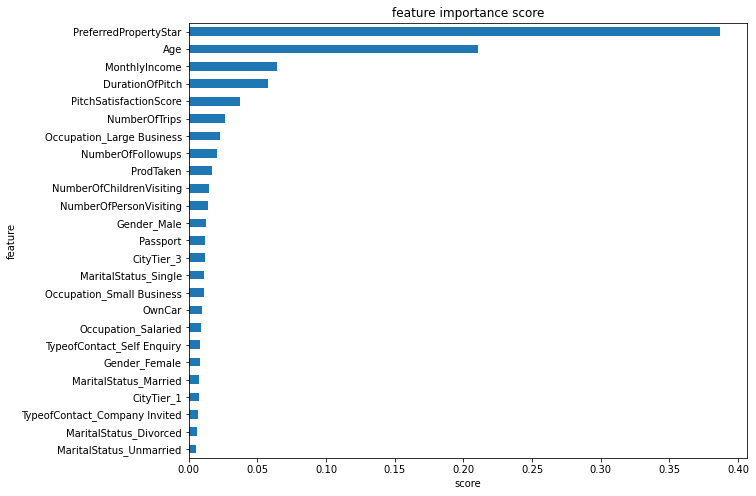

In [ ]:
show_feature_importance(rf)

In [ ]:
X2 = df[['PreferredPropertyStar', 'Age', 'MonthlyIncome', 'DurationOfPitch', 'PitchSatisfactionScore']]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train2,y_train2)

y_pred2 = rf.predict(X_test2)
y_proba2 = rf.predict_proba(X_test2)
y_proba2 = y_proba2[:,1]
eval_classification(rf, y_pred2, y_proba2, X_train2, y_train2, X_test2, y_test2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 1.00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
y_proba = rf_tuned.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(rf_tuned, y_pred, y_proba,  X_train, y_train, X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


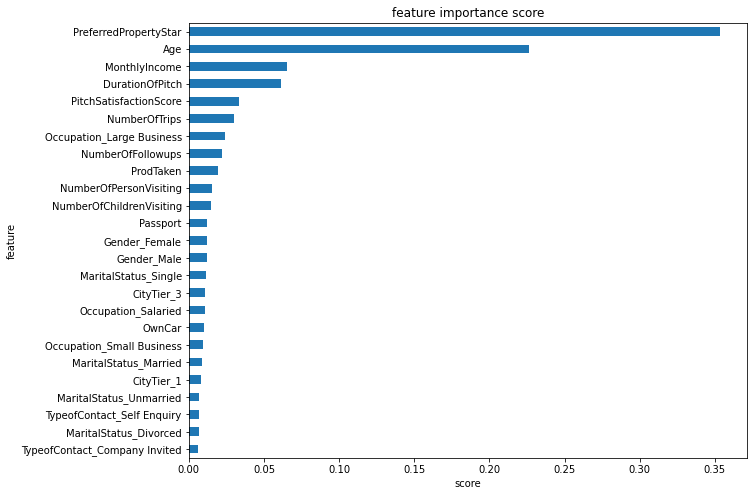

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
X2 = df[['PreferredPropertyStar', 'Age', 'MonthlyIncome', 'DurationOfPitch', 'PitchSatisfactionScore']]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

rf_tuned.fit(X_train2,y_train2)

y_pred2 = rf_tuned.predict(X_test2)
y_proba2 = rf_tuned.predict_proba(X_test2)
y_proba2 = y_proba2[:,1]
eval_classification(rf_tuned, y_pred2, y_proba2, X_train2, y_train2, X_test2, y_test2)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Accuracy (Test Set): 0.99
Precision (Test Set): 0.93
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
AUC: 1.00


In [ ]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


### Boosting : AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
y_proba = ab.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(ab, y_pred, y_proba, X_train, y_train, X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


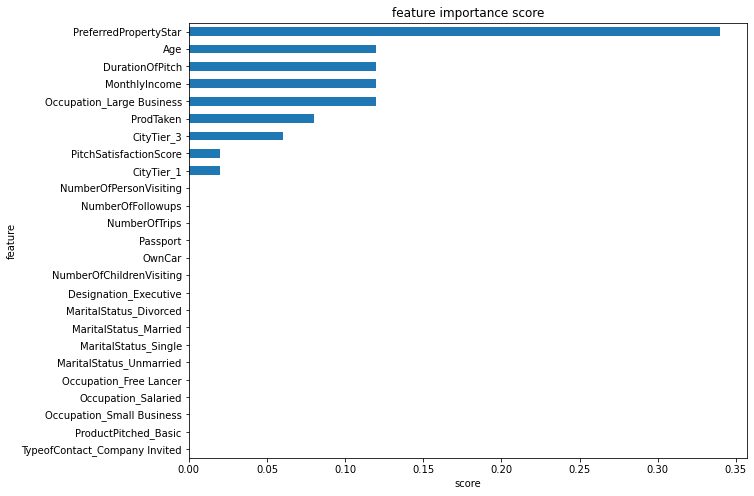

In [ ]:
show_feature_importance(ab)

In [ ]:
X2 = df[['PreferredPropertyStar', 'Age', 'DurationOfPitch', 'MonthlyIncome',  'Occupation_Large Business']]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

ab.fit(X_train2,y_train2)

y_pred = ab.predict(X_test2)
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test2, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test2, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test2, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test2, y_pred))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=42),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001,
                                                          0.006210526315789474,
                                                          0.011421052631578946,
                                                          0.01663157894736842,
                                                          0.02184210526...
                                                          0.06352631578947368,
                            

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


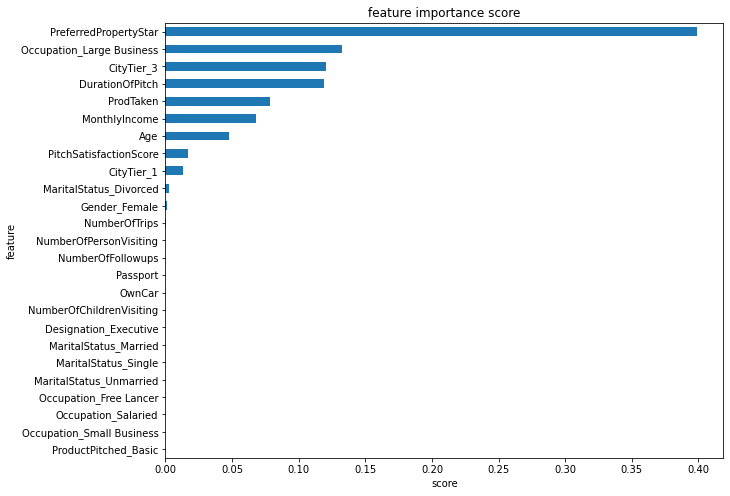

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

In [ ]:
X2 = df[['PreferredPropertyStar', 'Occupation_Large Business', 'CityTier_3', 'DurationOfPitch', 'ProdTaken' ]]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

ab_tuned.fit(X_train2,y_train2)

y_pred = ab_tuned.predict(X_test2)
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test2, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test2, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test2, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test2, y_pred))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=42),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001,
                                                          0.006210526315789474,
                                                          0.011421052631578946,
                                                          0.01663157894736842,
                                                          0.02184210526...
                                                          0.06352631578947368,
                            


Accuracy (Test Set): 0.93
Precision (Test Set): 0.53
Recall (Test Set): 0.33
F1-Score (Test Set): 0.41


### Boosting XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


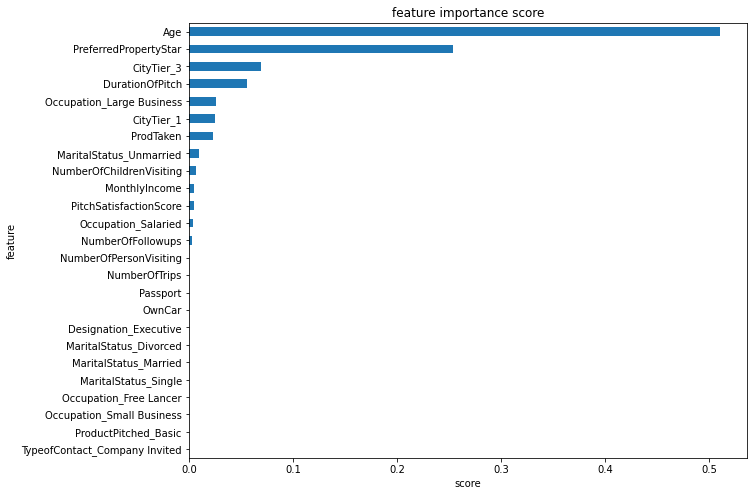

In [ ]:
show_feature_importance(xg)

In [ ]:
X2 = df[['Age', 'PreferredPropertyStar', 'Occupation_Large Business', 'CityTier_3', 'DurationOfPitch' ]]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

xg.fit(X_train2,y_train2)

y_pred = xg.predict(X_test2)
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test2, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test2, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test2, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test2, y_pred))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'lambda': [0.0, 0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                  


Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


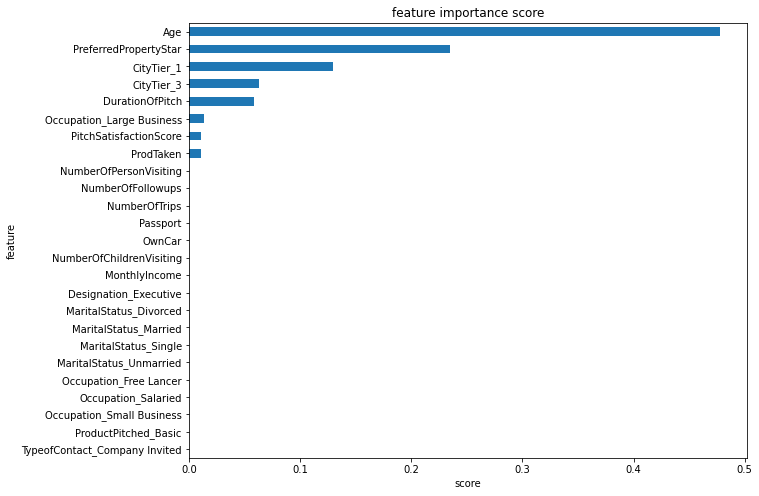

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
X2 = df[['Age', 'PreferredPropertyStar', 'Occupation_Large Business', 'CityTier_3', 'DurationOfPitch' ]]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

xg_tuned.fit(X_train2,y_train2)

y_pred = xg_tuned.predict(X_test2)
print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test2, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test2, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test2, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test2, y_pred))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'lambda': [0.0, 0.1, 0.2,
                                                   0.30000000000000004, 0.4,
                                  


Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


lr = LogisticRegression()
knn = KNeighborsClassifier()
knn_clf = KNeighborsClassifier()

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression()), 
        ('knn', KNeighborsClassifier()), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(X_train, y_train)
y_pred = vote_model.predict(X_test)

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
